### Mandy's Medical Appt No Show Project

In [1]:
# first import libraries, define encoders etc

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, StandardScaler


enc = OrdinalEncoder()
scaler = StandardScaler()

In [3]:
# Pull in our dataset and just look at the first 3 rows to get an idea of what we are looking at

In [4]:
starterdataset = pd.read_csv("KaggleV2-May-2016.csv")
starterdataset.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### From the source it mentions that the most important (hence target) is show-up or no-show for our knowledge as we proceed

In [5]:
# Check for missing data
nan_count = starterdataset.isna().sum()

print(nan_count)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [6]:
# No missing data found
#Instructions are to extract (drop) the following columns
dataset = starterdataset.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay", "Neighbourhood"], axis = 1)
dataset.head(5)

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,0,1,0,0,0,0,No
1,M,56,0,0,0,0,0,0,No
2,F,62,0,0,0,0,0,0,No
3,F,8,0,0,0,0,0,0,No
4,F,56,0,1,1,0,0,0,No


In [7]:
#Ok and I personally prefer my target to be at the beginning so i'm going to move it there with pop insert.
col = dataset.pop('No-show')
dataset.insert(0, col.name, col)

dataset.head(3)

,No-show,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,No,F,62,0,1,0,0,0,0
1,No,M,56,0,0,0,0,0,0
2,No,F,62,0,0,0,0,0,0


In [8]:
# Now the instructions mention incorrect spelling in the dataset, maybe we should correct the spelling mistakes
dataset.columns = ['No-show', 'Gender', 'Age', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']
dataset.head(3)

,No-show,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,No,F,62,0,1,0,0,0,0
1,No,M,56,0,0,0,0,0,0
2,No,F,62,0,0,0,0,0,0


In [9]:
# better!  Now Preprocessing - Unsure if scaling needed but do need to encode 2 columns of Nominal (catagorical) data, 
# the target " No-show" and "Gender" so ordinal encoder as it's just the 2 columns, let's make sure the rest are numerical though quickly
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   No-show       110527 non-null  object
 1   Gender        110527 non-null  object
 2   Age           110527 non-null  int64 
 3   Scholarship   110527 non-null  int64 
 4   Hypertension  110527 non-null  int64 
 5   Diabetes      110527 non-null  int64 
 6   Alcoholism    110527 non-null  int64 
 7   Handicap      110527 non-null  int64 
 8   SMS_received  110527 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 7.6+ MB


In [10]:
#Confirmed so let's encode those two
dataset[["No-show","Gender"]] = enc.fit_transform(dataset[["No-show","Gender"]])

In [11]:
dataset.head(10)

,No-show,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,0.0,0.0,62,0,1,0,0,0,0
1,0.0,1.0,56,0,0,0,0,0,0
2,0.0,0.0,62,0,0,0,0,0,0
3,0.0,0.0,8,0,0,0,0,0,0
4,0.0,0.0,56,0,1,1,0,0,0
5,0.0,0.0,76,0,1,0,0,0,0
6,1.0,0.0,23,0,0,0,0,0,0
7,1.0,0.0,39,0,0,0,0,0,0
8,0.0,0.0,21,0,0,0,0,0,0
9,0.0,0.0,19,0,0,0,0,0,0


In [12]:
# I'm not sure anything needs scaling - possibly age but it might be important to see how age affects it? Let's try first without

## let's do a heatmap to see what it looks like
plt.figure()
sns.heatmap(dataset.corr(), annot=True).set_title('Features -  no scaling')

In [14]:
dataset[["Gender","Age",
    "Scholarship","Hypertension","Diabetes","Alcoholism","Handicap","SMS_received"]] = scaler.fit_transform(dataset[["Gender","Age",
    "Scholarship","Hypertension","Diabetes","Alcoholism","Handicap","SMS_received"]])

In [15]:
dataset.head(10)

,No-show,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,0.0,-0.733837,1.077932,-0.330112,2.017378,-0.278261,-0.177068,-0.137722,-0.687612
1,0.0,1.362701,0.818306,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612
2,0.0,-0.733837,1.077932,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612
3,0.0,-0.733837,-1.258708,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612
4,0.0,-0.733837,0.818306,-0.330112,2.017378,3.593747,-0.177068,-0.137722,-0.687612
5,0.0,-0.733837,1.683728,-0.330112,2.017378,-0.278261,-0.177068,-0.137722,-0.687612
6,1.0,-0.733837,-0.609641,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612
7,1.0,-0.733837,0.082697,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612
8,0.0,-0.733837,-0.696184,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612
9,0.0,-0.733837,-0.782726,-0.330112,-0.495693,-0.278261,-0.177068,-0.137722,-0.687612


Text(0.5, 1.0, 'Features - Scaled')

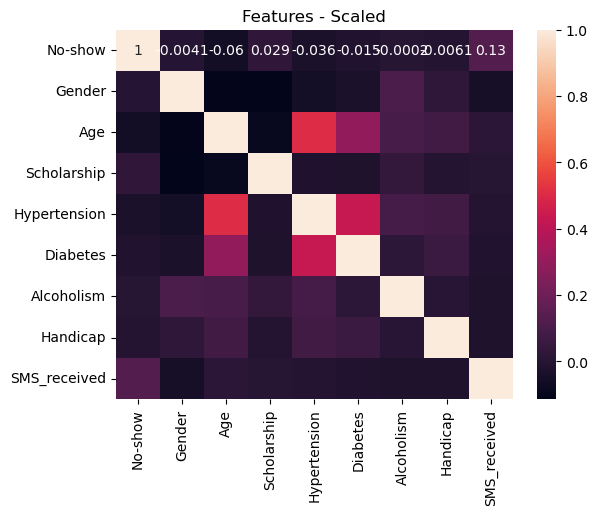

In [16]:
# let's do a heatmap to see what it looks like Scaled - I don't see much difference
plt.figure()
sns.heatmap(dataset.corr(), annot=True).set_title('Features - Scaled')

In [17]:
#Train test split with validation
encoded_y = dataset.iloc[:, 0].values
encoded_x = dataset.iloc[:, 1:9].values

# train is now 80% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(encoded_x, encoded_y, test_size=0.2)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_train, y_train, test_size=.5) 

# uncomment to see if you want below, just tidying
#print(X_train, X_val, X_test)

Next we are doing our decision trees first on our test data we will try first with criterion entropy then Gini and see which performs best

In [18]:
model_tree = DecisionTreeClassifier(criterion = "entropy", 
                                    max_leaf_nodes = 1000)

In [19]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=1000)

In [20]:
y_pred_tree = model_tree.predict(X_test)

In [21]:
print(confusion_matrix(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))

[[35224    69]
 [ 8717   201]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     35293
         1.0       0.74      0.02      0.04      8918

    accuracy                           0.80     44211
   macro avg       0.77      0.51      0.47     44211
weighted avg       0.79      0.80      0.72     44211



<Axes: xlabel='Age', ylabel='Hypertension'>

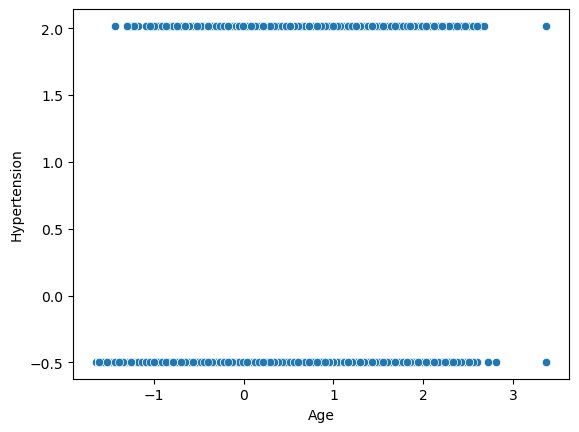

In [22]:
#was just curious but also failtastic
sns.scatterplot(x="Age",
                    y="Hypertension",
                    data=dataset)

In [23]:
#ok now with Gini criterior
model_tree2 = DecisionTreeClassifier(criterion = "gini", 
                                    max_leaf_nodes = 1000)

In [24]:
model_tree2.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=1000)

In [25]:
y_pred_tree2 = model_tree2.predict(X_test)

In [26]:
print(confusion_matrix(y_test,y_pred_tree2))
print(classification_report(y_test,y_pred_tree2))

[[35212    81]
 [ 8685   233]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     35293
         1.0       0.74      0.03      0.05      8918

    accuracy                           0.80     44211
   macro avg       0.77      0.51      0.47     44211
weighted avg       0.79      0.80      0.72     44211



In [27]:
train_score = {}
test_score = {}
n_estimators = np.arange(10,100, 15)
for forest in n_estimators:
    test = RandomForestClassifier(n_estimators=forest)
    test.fit(X_train, y_train)
    train_score[test]=test.score(X_train, y_train)
    test_score[test]=test.score(X_test, y_test)# And then it looks like it's comparing?


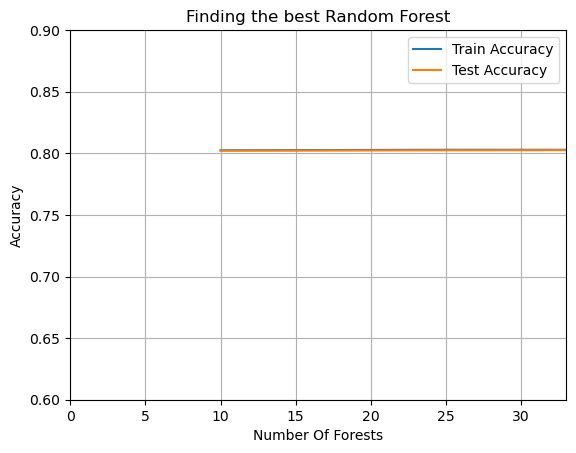

In [28]:
plt.plot(n_estimators, train_score.values(), label="Train Accuracy")
plt.plot(n_estimators, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy")
plt.title("Finding the best Random Trees within the Forest")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

In [29]:
#And now random forest

In [30]:
model_RF = RandomForestClassifier(n_estimators = 100, # Default is 100
                                  bootstrap = True)

In [31]:
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [32]:
y_pred_RF = model_RF.predict(X_test)

In [33]:
print(confusion_matrix(y_test,      y_pred_RF))
print(classification_report(y_test, y_pred_RF))

[[35141   152]
 [ 8582   336]]
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89     35293
         1.0       0.69      0.04      0.07      8918

    accuracy                           0.80     44211
   macro avg       0.75      0.52      0.48     44211
weighted avg       0.78      0.80      0.72     44211



So based on my model testing it appeared that they all performed very similarly so I chose to go with Decision Tree with criterion Entropy. I'll use that with my validation set to finish

In [34]:
val_tree = DecisionTreeClassifier(criterion = "entropy", 
                                    max_leaf_nodes = 1000)

In [35]:
val_tree.fit(X_val, y_val)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=1000)

In [36]:
y_pred_val_tree = val_tree.predict(X_test)

In [37]:
print(confusion_matrix(y_test,y_pred_val_tree))
print(classification_report(y_test,y_pred_val_tree))

[[34946   347]
 [ 8757   161]]
              precision    recall  f1-score   support

         0.0       0.80      0.99      0.88     35293
         1.0       0.32      0.02      0.03      8918

    accuracy                           0.79     44211
   macro avg       0.56      0.50      0.46     44211
weighted avg       0.70      0.79      0.71     44211

